In [1]:
# Import libraries:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Practical Exercise 2

This exercise uses an easy to use modification of the original MNIST hand written digits.
In particular, we use MNIST test data that contains 10,000 images in a csv format from [Kaggle](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/). The csv file is stored in ```/sources/sheet2```. The file ```mnist_test.csv``` contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).

In [9]:
# Read csv containint 10,000 test examples:
mnist_test_pd = pd.read_csv("../../sources/sheet2/mnist_test.csv")

# Convert to numpy array:
mnist_test_np = np.array(mnist_test_pd)

# Extract first column of second dimension, that contains labels:
labels = mnist_test_np[:,0]

# Keep only the pixel values in mnist data:
mnist_test = mnist_test_np[:,1:]

# Check dimensions:
print('Data dimensions (#samples, #pixels):',np.shape(mnist_test))
print('Label dimensions (#samples):',np.shape(labels))

Data dimensions (#samples, #pixels): (10000, 784)
Label dimensions (#samples): (10000,)


#### Exercise L-1.1 (Random variables and statistics)

a. Generate two $N \times N$ matrices $A$ and $B$ containing integer random values (set $N=100$). The numbers in $A$ must be uniformly distributed in the interval $[0,10)$ and in $B$ normally distributed with mean $0$ and standard deviation $\sigma = 10$.

In [78]:
# Set N, mean mu and standard deviation sigma:
N = 100
mu = 0.0
sigma = 10.0

# Generate matrix A: Start with floating point random values. Then, truncate the decimal values for A to assure the interval [0,10).
# Finally, switch to integer type:
A = np.floor(np.random.uniform(low=0.0, high=10.0, size=(N,N))).astype(int)

# Generate matix B: Start with floating point random values, normally distributed. Then, round to the nearest integer value.
# Finally, switch to integer type:
B = np.round(np.random.normal(loc=mu, scale=sigma, size=(N,N)),0).astype(int)

b. Compute the minimum and maximum element of $A$ and $B$. Store the results in ```amin```, ```amax```, ```bmin```, and ```bmax```.

In [79]:
# Get min and max values for A and B:
amin = np.min(A)
amax = np.max(A)
bmin = np.min(B)
bmax = np.max(B)

In [80]:
# Check statistics:
print("minimum value in A:", np.round(amin,4))
print("maximum value in A:", np.round(amax,4))
print("\nminimum value in B:", np.round(bmin,4))
print("maximum value in B:", np.round(bmax,4))
print("\nmean value for values in B:", np.round(np.mean(B),3))
print("std. dev. for values in B:", np.round(np.std(B),3))

minimum value in A: 0
maximum value in A: 9

minimum value in B: -35
maximum value in B: 42

mean value for values in B: -0.09
std. dev. for values in B: 10.015


c. Determine the frequency of each matrix element in $A$ (respectively $B$) and store it as
follows in vector $a$ (resp. $b$): The first element of $a$ ($b$) contains the frequency of the
smallest element in $A$ ($B$) and the last element of $a$ ($b$) contains the frequency of the largest
element in $A$ ($B$).

In [81]:
# Use function to obtain unique elements (sorted) for matrices A and B. Store the results in a_elements and b_elements, respectively. 
# Additionally, keep the frequency of each unique element. Store the results in a and b, respectively:
a_elements, a = np.unique(A, return_counts=True)
b_elements, b = np.unique(B, return_counts=True)

d. Draw the frequency distributions in vector a and b into two separate figures (Figure 1 and
Figure 2). Label them appropriately. Note that this graphical representation of the distribution of data is called a *histogram*.

e. Since the data in matrix A is uniformly distributed, all components of vector a should have
similar values which must be evenly distributed around the mean frequency value.
Illustrate this fact by plotting the mean of all components in $A$ as horizontal line into Figure 1.

In [82]:
## Prepare plot:

# Get mean frequency for unique elements in A:
a_freq_mean = np.mean(a)

# Create array of length equal to the number of unique elements contained in A. As value set the mean frequency.
a_freq_mean_array = a_freq_mean * np.ones(len(a_elements))

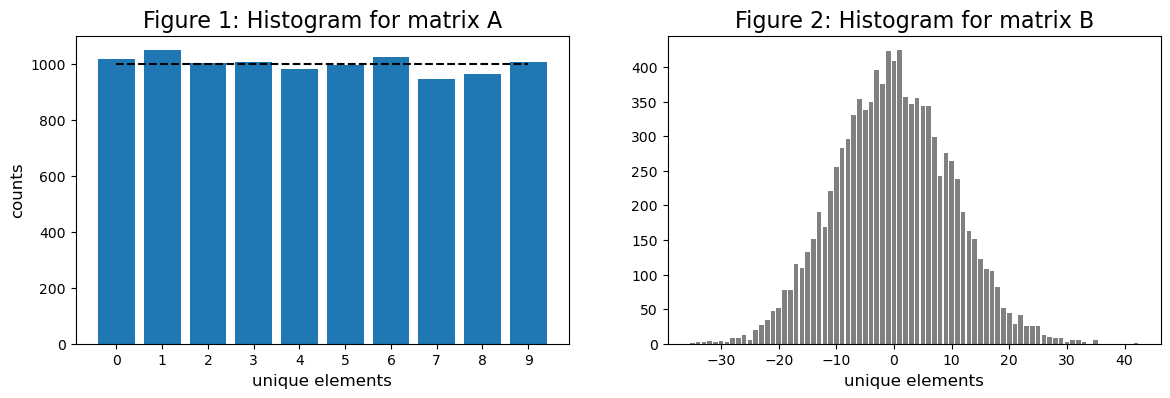

In [83]:
## Plot histograms:

# Initialize plot, containing two figures:
fig, axes = plt.subplots(1,2,figsize=(14,4))

# Draw histogram for matrix A:
axes[0].bar(a_elements, a, tick_label=a_elements)
axes[0].set_title('Figure 1: Histogram for matrix A', fontsize=16)
axes[0].set_xlabel('unique elements', fontsize=12)
axes[0].set_ylabel('counts', fontsize=12)

# Add horizontal line for indicating mean value:
axes[0].plot(a_elements, a_freq_mean_array, color='black', linestyle='--')

# Draw histogram for matrix B:
axes[1].bar(b_elements, b, color='grey')
axes[1].set_title('Figure 2: Histogram for matrix B', fontsize=16)
axes[1].set_xlabel('unique elements', fontsize=12)

plt.show()

f. Generate probability distributions from the histograms using relative frequencies and plot
them into Figure 3 (vector $a$) and 4 (vector $b$). Show that the probabilities in each
distribution sum up to 1.

g. The data in matrix $B$ is normally distributed with mean value $\mu = 0$ and standard deviation
$\sigma = 10$. Its probability in Figure 3 can be described by the following function:

$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

In [84]:
# Get relative frequencies:
a_norm = a / N**2
b_norm = b / N**2

# Check if probabilities add up to 1:
print("sum of rel. frequencies for matrix A:", np.round(sum(a_norm),3))
print("sum of rel. frequencies for matrix B:", np.round(sum(b_norm),3))

sum of rel. frequencies for matrix A: 1.0
sum of rel. frequencies for matrix B: 1.0


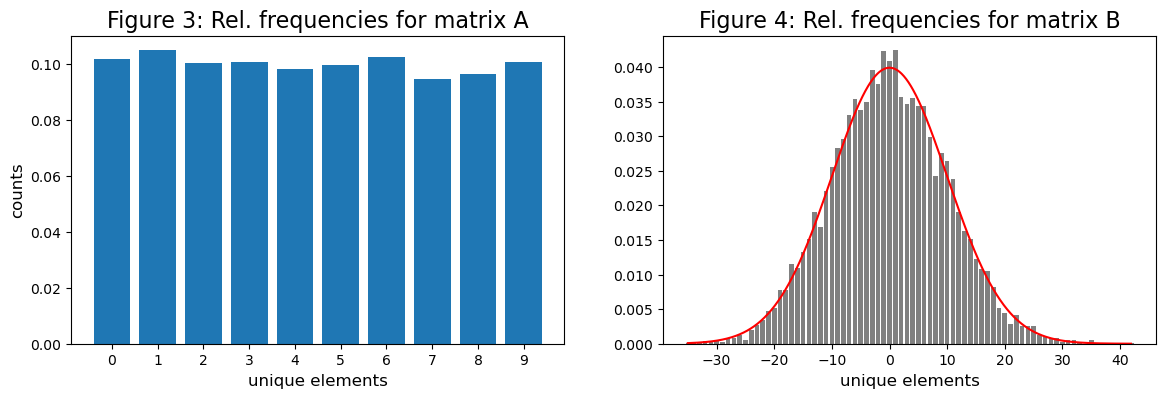

In [85]:
## Prepare plotting normal distribution:

# Create x-values between min and max of values in matrix B:
x = np.arange(bmin,bmax,0.1)

# Compute corresponding normal distribution:
x_normal_dist = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2) / (2 * sigma**2))

## Plot probability distributions (= rel. frequencies):

# Initialize plot, containing two figures:
fig, axes = plt.subplots(1,2,figsize=(14,4))

# Draw relative frequencies for matrix A:
axes[0].bar(a_elements, a_norm, tick_label=a_elements)
axes[0].set_title('Figure 3: Rel. frequencies for matrix A', fontsize=16)
axes[0].set_xlabel('unique elements', fontsize=12)
axes[0].set_ylabel('counts', fontsize=12)

# Draw relative frequencies for matrix B:
axes[1].bar(b_elements, b_norm, color='grey')
axes[1].set_title('Figure 4: Rel. frequencies for matrix B', fontsize=16)
axes[1].set_xlabel('unique elements', fontsize=12)

# Add normal distribution to Figure 4:
axes[1].plot(x, x_normal_dist, color='red')
plt.show()

h. Check the following statements in your program:

$68.3\%$ of all elements in B lie in the interval $[-\sigma,\sigma]$

$95.5\%$ of all elements in B lie in the interval $[-2\sigma,2\sigma]$

$99.7\%$ of all elements in B lie in the interval $[-3\sigma,3\sigma]$.

In [94]:
## Check statements:

# Get boolean vector, checking if element in B lies in the desired interval.
# Then, multiply the obtained boolean vector with the vector containing relative frequencies for all unique values in B.
# Finally, sum the obtained relative frequencies and multiply by 100 to obtain % values.
print(np.round(np.sum(((b_elements > -sigma) & (b_elements < sigma)) * b_norm)*100,3),"% of all elements in B  lie in the interval [-sigma,sigma]")
print(np.round(np.sum(((b_elements > -2*sigma) & (b_elements < 2*sigma)) * b_norm)*100,3),"% of all elements in B  lie in the interval [-2sigma,2sigma]")
print(np.round(np.sum(((b_elements > -3*sigma) & (b_elements < 3*sigma)) * b_norm)*100,3),"% of all elements in B  lie in the interval [-3sigma,3sigma]")

65.4 % of all elements in B  lie in the interval [-sigma,sigma]
95.13 % of all elements in B  lie in the interval [-2sigma,2sigma]
99.59 % of all elements in B  lie in the interval [-3sigma,3sigma]
